In [29]:
# Index
# user id User ID (unique)

# test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

# converted: If a person bought the product then True, else is False

# total ads: Amount of ads seen by person

# most ads day: Day that the person saw the biggest amount of ads

# most ads hour: Hour of day that the person saw the biggest amount of ads

 ---
#### Part 1. Data Cleaning and EDA

In [30]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import random
random.seed(42) 

import warnings
warnings.filterwarnings('ignore')

import os

In [31]:
df_p = pd.read_csv('marketing_AB.csv')

In [43]:
df_p.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [33]:
df_p.shape

(588101, 7)

In [34]:
df_p.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [35]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [36]:
df_p.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [37]:
df = df_p.drop_duplicates()

In [38]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


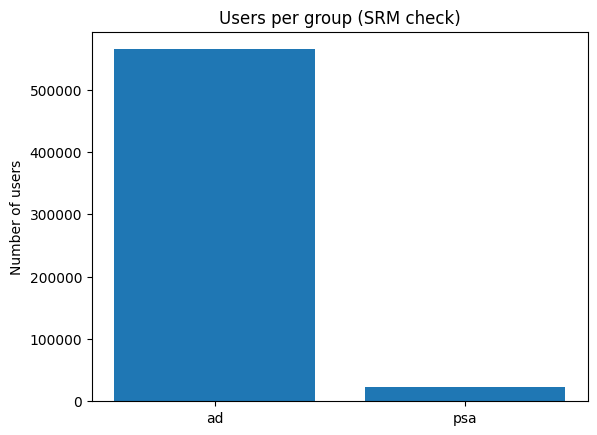

In [39]:
# SRM
import matplotlib.pyplot as plt

group_counts = df["test group"].value_counts()

plt.bar(group_counts.index, group_counts.values)
plt.title("Users per group (SRM check)")
plt.ylabel("Number of users")
plt.show()

In [44]:
print(f'Кількість унікальних користувачів: {len(df['user id'].unique())}')

Кількість унікальних користувачів: 588101


In [47]:
df['most ads day'].value_counts().head()

most ads day
Friday      92608
Monday      87073
Sunday      85391
Thursday    82982
Saturday    81660
Name: count, dtype: int64

In [60]:
df['most ads hour'].value_counts().head()

most ads hour
13    47655
12    47298
11    46210
14    45648
15    44683
Name: count, dtype: int64

In [76]:
print(f'Середнє значення кількості рекламних оголошен {df["total ads"].mean()}')
print(f'Максимальне значення кількості рекламних оголошень {df["total ads"].max()}')
print(f'Мінімальне значення кількості рекламних оголошень {df["total ads"].min()}')

Середнє значення кількості рекламних оголошен 24.82087600599217
Максимальне значення кількості рекламних оголошень 2065
Мінімальне значення кількості рекламних оголошень 1


In [78]:
print(f' Найчастіший день показів та кількість показів в цей день {df["most ads day"].value_counts().head(1)}')

 Найчастіший день показів та кількість показів в цей день most ads day
Friday    92608
Name: count, dtype: int64


In [83]:
print(f'Найчастіший день показів та кількість показів в цей день в розрізі test group {df.groupby("test group")["most ads day"].value_counts().groupby(level=0).head(1)}')

Найчастіший день показів та кількість показів в цей день в розрізі test group test group  most ads day
ad          Friday          88805
psa         Thursday         3905
Name: count, dtype: int64


In [52]:
day_hour_by_group = (
    df.groupby(["test group", "most ads day", "most ads hour"])
      .size()
      .reset_index(name="users_cnt")
      .sort_values(["test group", "users_cnt"], ascending=[True, False])
)

day_hour_by_group.head(20)

,test group,most ads day,most ads hour,users_cnt
13,ad,Friday,13,7166
86,ad,Sunday,14,6983
12,ad,Friday,12,6949
156,ad,Wednesday,12,6938
11,ad,Friday,11,6927
155,ad,Wednesday,11,6852
36,ad,Monday,12,6744
37,ad,Monday,13,6678
15,ad,Friday,15,6650
14,ad,Friday,14,6622


#### Частина 2. Probability

In [98]:
conversion = df["converted"].mean()  # якщо converted = 0/1
print(f'Загальна конверсія: {conversion}')

Загальна конверсія: 0.02523886203220195


In [87]:
pd.crosstab(df["test group"], df["converted"]) #Ми побудували перехресну таблицю, яка показує, скільки користувачів кожній групі (ad/psa) мають converted = 0 і converted = 1.

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [117]:
n_ad = df[df["test group"] == "ad"].shape[0]
n_psa = df[df["test group"] == "psa"].shape[0]
print(f'Кількість спостпережень в групі ad {n_ad}')
print(f'Кількість спостпережень в групі psa {n_psa}')

Кількість спостпережень в групі ad 564577
Кількість спостпережень в групі psa 23524


In [100]:
conversion_ad = df[df["test group"] =="ad"]["converted"].mean()
conversion_psa = df[df["test group"] =="psa"]["converted"].mean() # якщо converted = 0/1
print(f'Конверсія в групі ad: {conversion_ad}')
print(f'Конверсія в групі psa: {conversion_psa}')

Конверсія в групі ad: 0.025546559636683747
Конверсія в групі psa: 0.01785410644448223


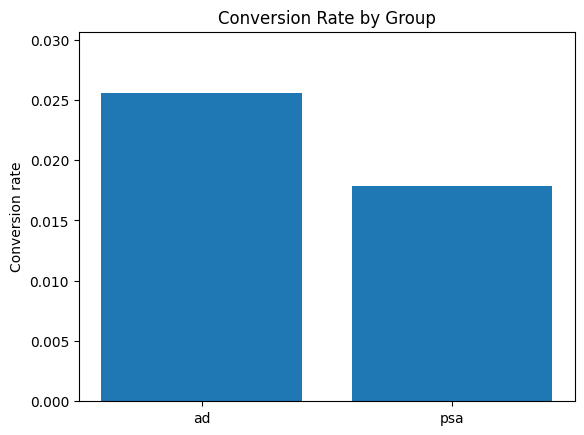

In [119]:
import matplotlib.pyplot as plt

# calculate group converted mean (conversion rate)
conv_by_group = df.groupby("test group")["converted"].mean()

# plot
plt.bar(conv_by_group.index, conv_by_group.values)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion rate")
plt.ylim(0, conv_by_group.max() * 1.2)
plt.show()

In [120]:
delta_ad = conversion - conversion_ad
print(f"Різниця між загальної конверсією та конверсією в групі ad  {delta_ad}")
delta_psa = conversion - conversion_psa
print(f"Різниця між загальної конверсією та конверсією в групі psa  {delta_psa}")

Різниця між загальної конверсією та конверсією в групі ad  -0.0003076976044817971
Різниця між загальної конверсією та конверсією в групі psa  0.00738475558771972


Counts (0/1):
converted
False    573258
True      14843
Name: count, dtype: int64

Shares (0/1):
converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64


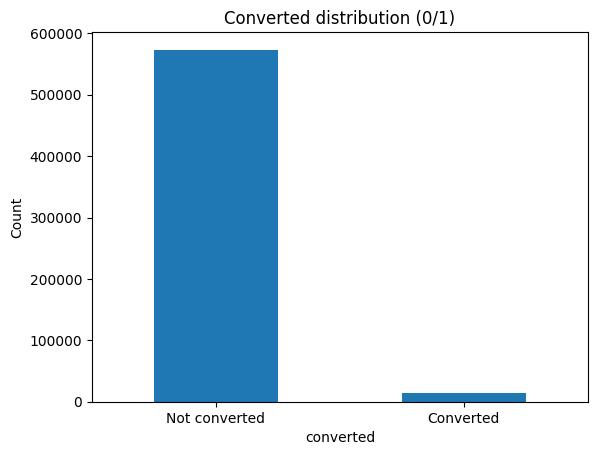

In [121]:
import matplotlib.pyplot as plt

# 1) Рахуємо, скільки разів зустрічається кожне значення у колонці converted (0 або 1)
#    Це "кількісний" розподіл: скільки НЕ сконвертувались (0) і скільки сконвертувались (1)
counts = df["converted"].value_counts()
print("Counts (0/1):")
print(counts)

# 2) Рахуємо частки (probability / share) для 0 і 1
#    normalize=True означає: замість кількості повернути частку від загальної кількості рядків
#    Наприклад 0.03 = 3% сконвертувались
shares = df["converted"].value_counts(normalize=True)
print("\nShares (0/1):")
print(shares)

# 3) Для коректного відображення на осі X впорядковуємо індекси:
#    sort_index() гарантує порядок 0, потім 1 (а не 1, потім 0)
counts_sorted = counts.sort_index()

# 4) Будуємо стовпчиковий графік розподілу converted за кількістю
#    (якщо хочеш графік у частках, можна будувати shares.sort_index())
counts_sorted.plot(kind="bar")

# 5) Оформлення графіка: заголовок та підписи на осі X
plt.title("Converted distribution (0/1)")
plt.xticks([0, 1], ["Not converted", "Converted"], rotation=0)

# 6) Підпис осі Y: тут ми показуємо саме кількість спостережень (Count)
plt.ylabel("Count")

# 7) Відображаємо графік
plt.show()

---
#### Part 3. A/B test

In [122]:
# Рахуємо uplift (відносне зростання конверсії)
# Формула показує, на скільки відсотків конверсія в групі ad вища (або нижча), ніж у контрольній групі psa
uplift = (conversion_ad - conversion_psa) / conversion_psa

# Виводимо конверсію для групи ad (частка converted = 1)
print(f"Conversion ad: {conversion_ad:.4f}")

# Виводимо конверсію для групи psa (частка converted = 1)
print(f"Conversion psa: {conversion_psa:.4f}")

# Виводимо uplift у відсотках
# група ad має конверсію на 43,09% вищу за psa
print(f"Uplift означає, що група ad має конверсію на 43,09% вищу за psa: {uplift:.2%}")

Conversion ad: 0.0255
Conversion psa: 0.0179
Uplift означає, що група ad має конверсію на 43,09% вищу за psa: 43.09%


In [123]:
# Зробити chi^2 test, bootstrap, z-test
import numpy as np
from scipy.stats import chi2_contingency, norm

### χ²-test (перевірка незалежності групи і конверсії)

In [110]:
# Створюємо contingency table: група × converted (0/1)
table = pd.crosstab(df["test group"], df["converted"])

# Виконуємо chi-square test
chi2, p_value_chi2, dof, expected = chi2_contingency(table)

print("chi2:", chi2)
print("p-value:", p_value_chi2)

chi2: 54.005823883685245
p-value: 1.9989623063390075e-13


### Bootstrap (симуляція різниці конверсій)

In [111]:
# Кількість ітерацій bootstrap
n_iter = 1000

means_diff = []

for _ in range(n_iter):
    # Bootstrap-вибірка з поверненням
    sample = df.sample(len(df), replace=True)
    
    # Конверсія у групах
    conv_ad = sample[sample["test group"] == "ad"]["converted"].mean()
    conv_psa = sample[sample["test group"] == "psa"]["converted"].mean()
    
    # Різниця конверсій
    means_diff.append(conv_ad - conv_psa)

means_diff = np.array(means_diff)

# Bootstrap p-value (ймовірність отримати різницю ≤ 0)
p_value_bootstrap = np.mean(means_diff <= 0)

print("\nBootstrap test")
print("Mean difference:", means_diff.mean())
print("p-value:", p_value_bootstrap)


Bootstrap test
Mean difference: 0.007667282963008104
p-value: 0.0


### Z-test для різниці пропорцій

In [ ]:
# Дані для z-test
conversoin = df.groupby("test group")["converted"].mean()
n = df.groupby("test group")["converted"].count()

p_ad = conversion_ad
p_psa = conversion_psa


# Обʼєднана конверсія
p_pool = (p_ad*n_ad + p_psa*n_psa) / (n_ad + n_psa) # шукай розрахунок вище

# Стандартна похибка
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_ad + 1/n_psa))

# Z-статистика
z = (p_ad - p_psa) / se

# Двосторонній p-value
p_value_z = 2 * (1 - norm.cdf(abs(z)))

print("\nZ-test")
print("z:", z)
print("p-value:", p_value_z)


Z-test
z: 7.3700781265454145
p-value: 1.7053025658242404e-13


### Висновки 


## χ²-test (перевірка незалежності групи і конверсії)

Ці результати означають, що різниця між групами є статистично значущою.

chi2 = 54.01 — дуже велике значення χ², тобто фактичні дані сильно відрізняються від очікуваних, якщо припускати, що група і конверсія не пов’язані.

p-value ≈ 2 × 10⁻¹³ — надзвичайно мале значення, набагато менше 0.05.

Висновок

Ми відхиляємо нульову гіпотезу про незалежність групи та конверсії.
Це означає, що належність до групи (ad vs psa) істотно впливає на конверсію.


Результати χ²-тесту показали статистично значущу залежність між тестовою групою та фактом конверсії (χ² = 54.01, p < 0.001). Отже, різниця в конверсіях між групами не є випадковою.

## Bootstrap (симуляція різниці конверсій)

Що означають числа

Mean difference = 0.00767
→ у середньому конверсія в ad вища за psa приблизно на 0.77 процентного пункту.

p-value = 0.0
→ у bootstrap-симуляціях жодного разу різниця конверсій не була ≤ 0.
Тобто за наявними даними ймовірність, що ad не краща за psa, практично нульова.

Висновок

Bootstrap-тест показує, що ефект стабільний і статистично значущий:
група ad має вищу конверсію, і це не випадковість.


Bootstrap-аналіз показав середню різницю конверсій між ad та psa на рівні 0.77 п.п.; у жодній із 1000 симуляцій різниця не була від’ємною (p-value ≈ 0), що свідчить про статистично значущий ефект на користь ad.

Примітка: p-value = 0.0 у bootstrap означає «менше ніж 1 / n_iter» (тут < 0.001), а не буквально нуль.

## Z-tes

Ось що означають результати Z-test:

z = 7.37 — дуже велике додатне значення, тобто різниця конверсій між групами набагато більша, ніж можна було б очікувати від випадкового шуму.

p-value ≈ 1.7 × 10⁻¹³ — надзвичайно мале значення, значно менше 0.05.

Висновок

Ми відхиляємо нульову гіпотезу про рівність конверсій.
Це означає, що конверсія в групі ad статистично значущо вища, ніж у групі psa.

Z-test для різниці пропорцій показав статистично значущу перевагу групи ad над psa (z = 7.37, p < 0.001).

Узгодженість тестів

Те, що χ²-test, bootstrap і z-test дали однаковий висновок, означає, що результат надійний, а не артефакт одного методу.